## author : Rohan Bhukar

### Standard Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import scipy.io

### Project Imports

In [4]:
import scipy
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import math
import random

In [5]:
from matplotlib import cm

In [6]:
import math

In [7]:
mat = scipy.io.loadmat('hw2_data-1.mat')

### Q1. Display the covariance matrices of each group, D and N.

In [8]:
df_d = pd.DataFrame(mat['D'],columns=['biom_1','biom_2'])

In [9]:
df_n = pd.DataFrame(mat['N'],columns=['biom_1','biom_2'])

In [10]:
df_d.head()

,biom_1,biom_2
0,8.573669,10.506308
1,11.137830,9.973567
2,11.526745,9.675627
3,8.764037,10.095469
4,7.967486,10.268597


In [11]:
## take transpose with numpy to get 2 x 2 array

In [12]:
covar_mat_d = np.cov(np.transpose(df_d))

In [13]:
covar_mat_n = np.cov(np.transpose(df_n))

In [14]:
print('Shape of this 2-D array for group D :',np.shape(mat['D']))
print('\n\n Covariance matrix of group D :\n\n',covar_mat_d)

Shape of this 2-D array for group D : (38, 2)


 Covariance matrix of group D :

 [[ 2.55845544 -0.37258218]
 [-0.37258218  0.09561274]]


In [15]:
print('Shape of this 2-D array for group N :',np.shape(mat['N']))
print('\n\n Covariance matrix of group N :\n\n',covar_mat_n)

Shape of this 2-D array for group N : (44, 2)


 Covariance matrix of group N :

 [[ 0.53446557 -0.12443014]
 [-0.12443014  0.09016302]]


## displaying the matrices

In [16]:
sns.set(rc={'figure.figsize':(10,10)})

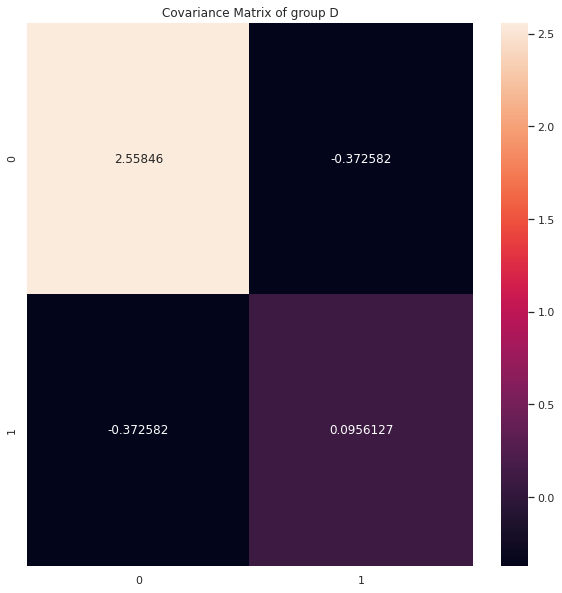

In [17]:
sns.heatmap(covar_mat_d, annot=True, fmt='g')
plt.title('Covariance Matrix of group D')
plt.show()

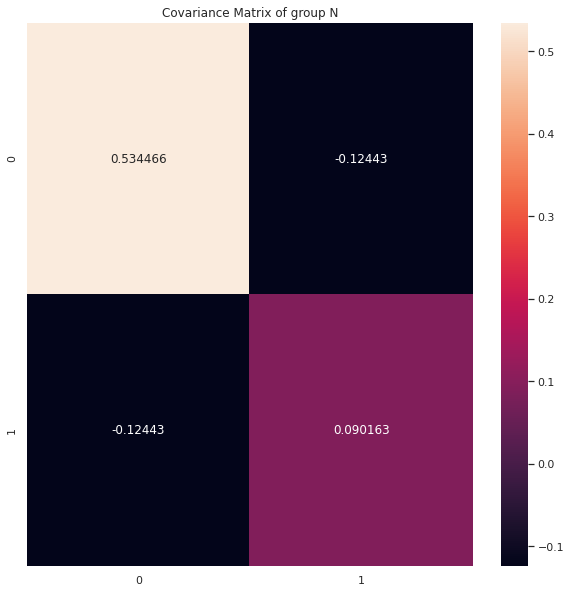

In [18]:
sns.heatmap(covar_mat_n, annot=True, fmt='g')
plt.title('Covariance Matrix of group N')
plt.show()

## Q2. ​ Assuming that these groups follow multivariate normal distributions, use the covariance matrices to generate a 3D surface plot that clearly shows the PDFs of both groups.

In [24]:
sns.set(rc={'figure.figsize':(20,20)})

In [20]:
%matplotlib notebook

In [21]:
x = df_d['biom_1'] 
y = df_d['biom_2'] 
X,Y = np.meshgrid(x,y)
pos = np.dstack((X,Y))
mu = np.mean(mat['D'],axis=0) 
the_cov = covar_mat_d 
rv = multivariate_normal(mu,the_cov)
Z = rv.pdf(pos)

In [22]:
x = df_n['biom_1'] 
y = df_n['biom_2'] 
X1,Y1 = np.meshgrid(x,y)
pos = np.dstack((X1,Y1))
mu = np.mean(mat['N'],axis=0) 
the_cov = covar_mat_n 
rv = multivariate_normal(mu,the_cov)
Z1 = rv.pdf(pos)

<IPython.core.display.Javascript object>


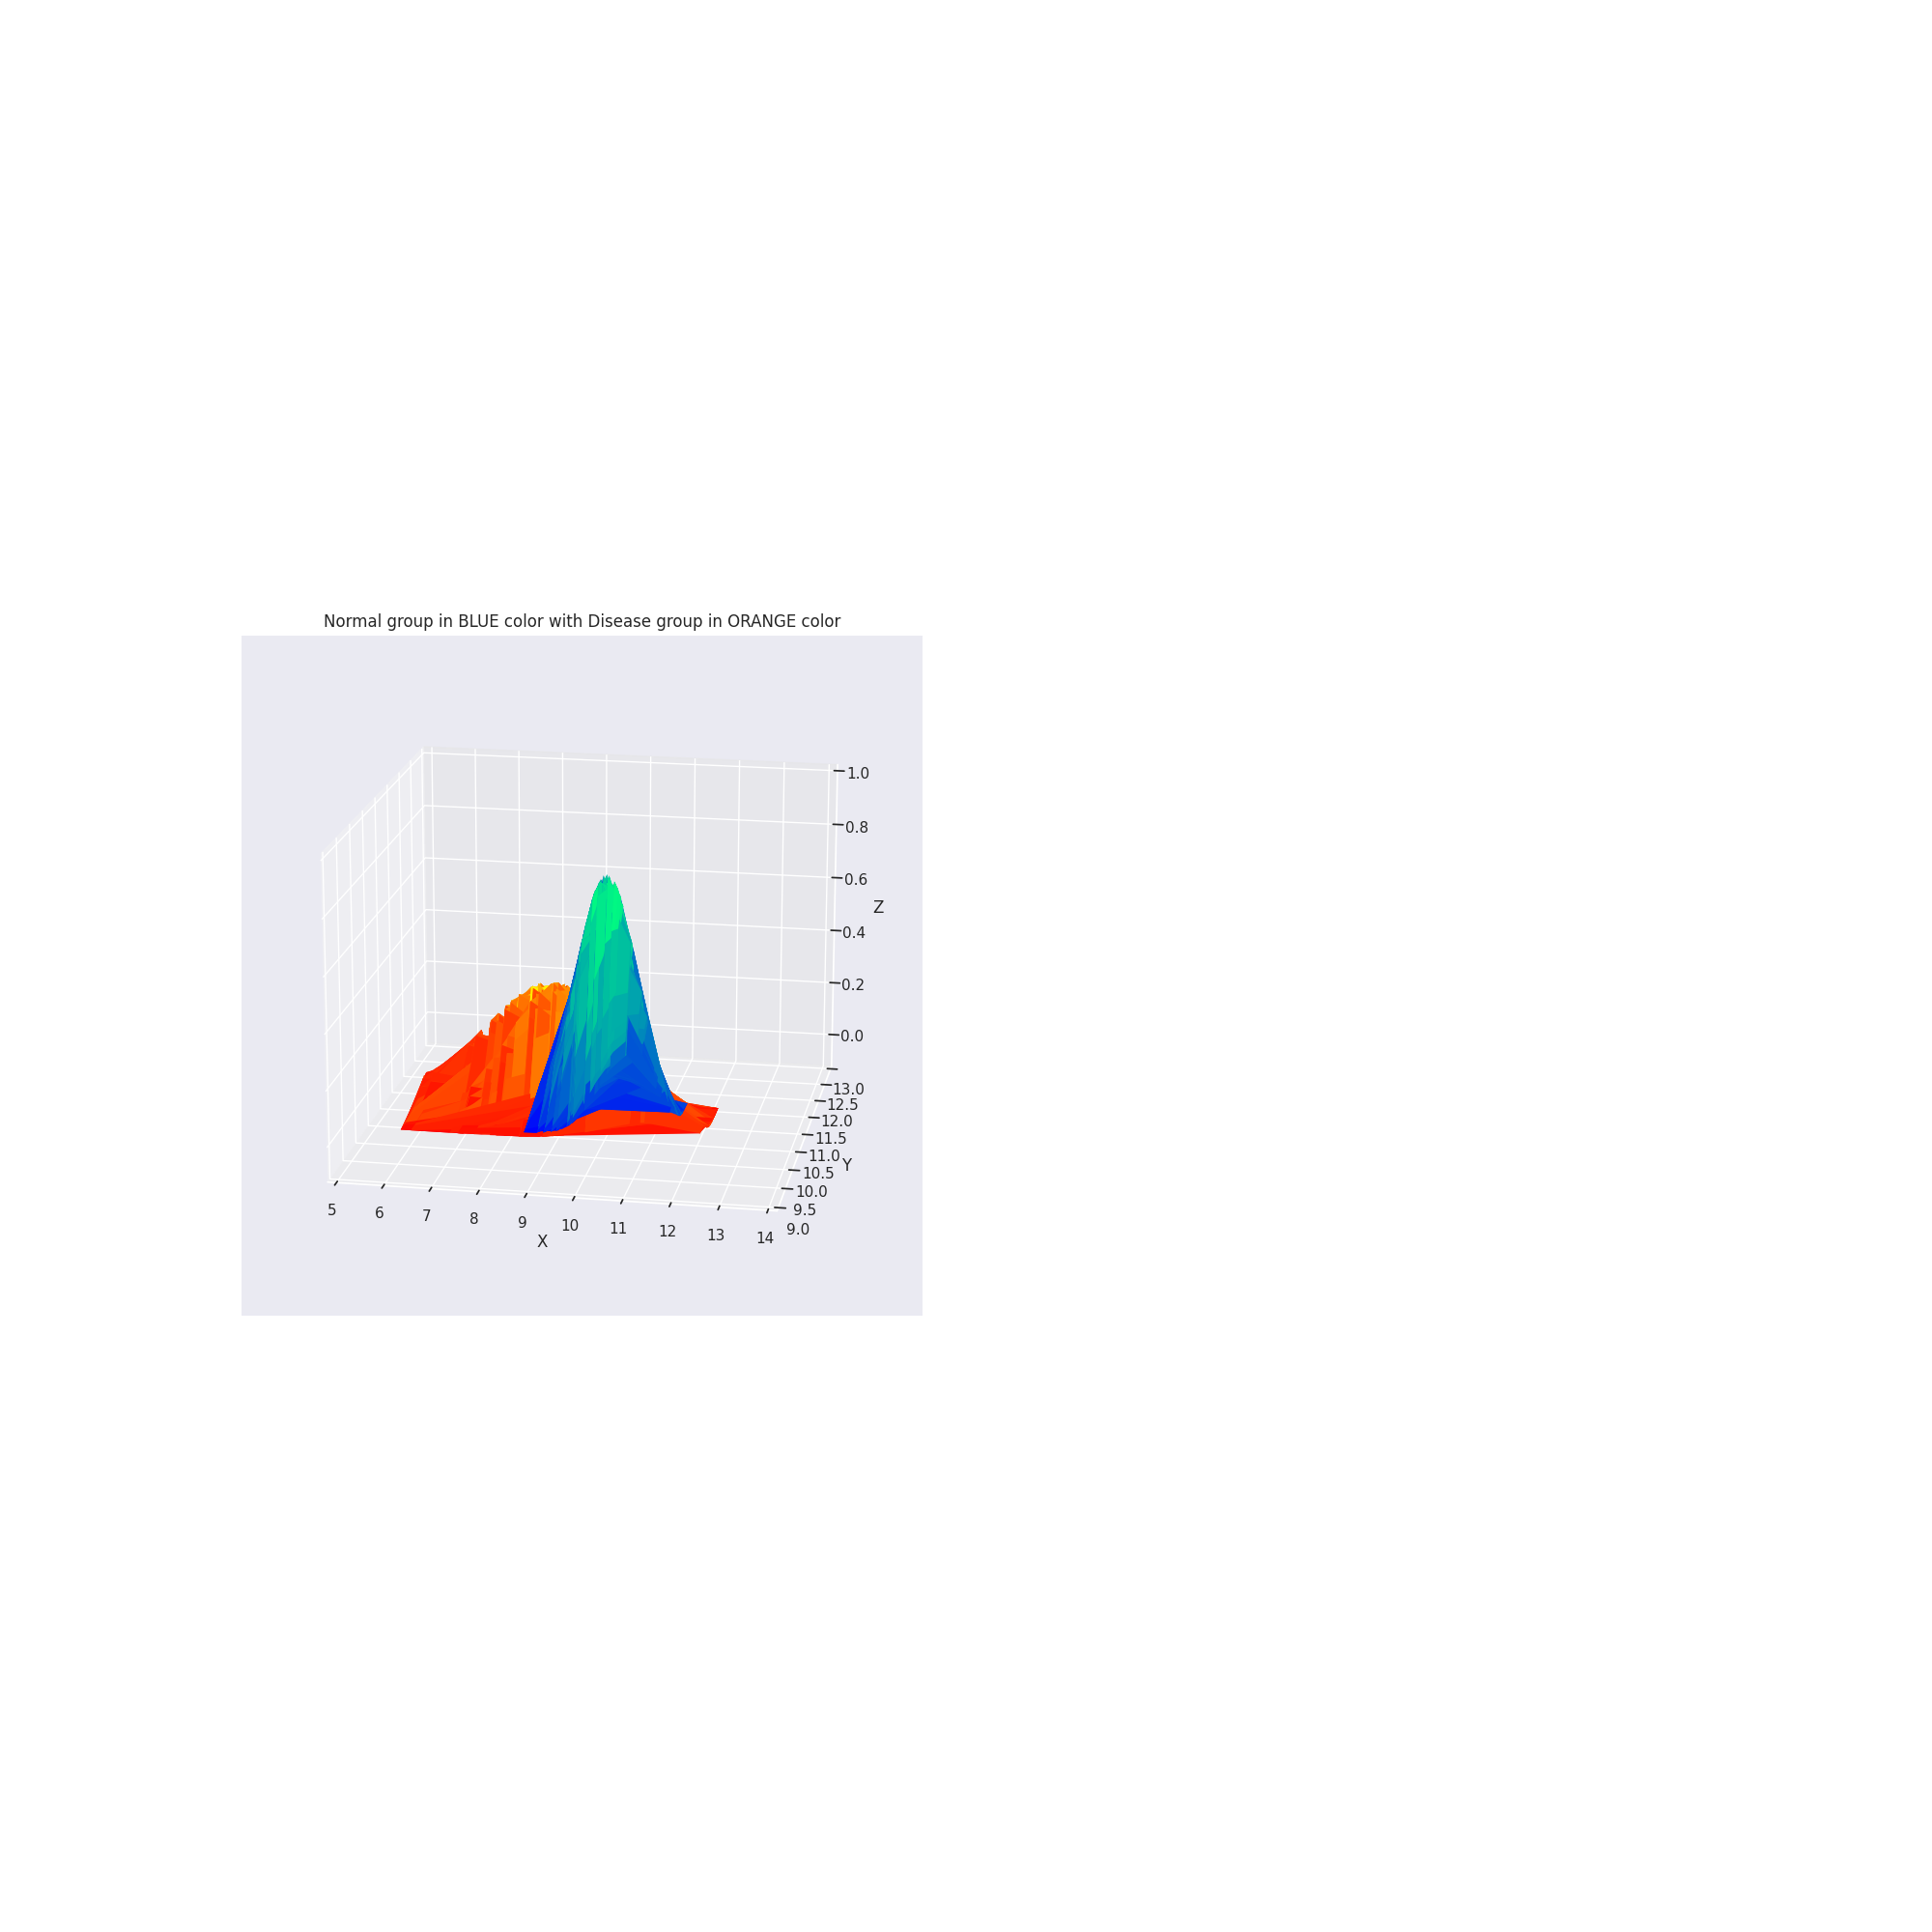

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1,projection = '3d')
ax.plot_surface(X1,Y1,Z1,rstride=1, cstride=1, cmap=cm.winter,
    linewidth=0, antialiased=True)
ax.plot_surface(X,Y,Z,rstride=1, cstride=1, cmap=cm.autumn,
    linewidth=0, antialiased=True)
fig.show()
ax.set_xlabel('X')
ax.set_xlim3d(5, 14)
ax.set_ylabel('Y')
ax.set_ylim3d(9, 13)
ax.set_zlabel('Z')
ax.set_zlim3d(-0.1, 1)
plt.title('Normal group in BLUE color and the Disease group in ORANGE color')
plt.show()

In [115]:
## 3D surface plot rotates, use the inline feature

## Q3. Calculate the Bayesian decision function

In [26]:
## given from the question :-
p_D = 0.005
p_N = 0.995

In [116]:
## all necessary derivations

In [27]:
population_D = np.shape(mat['D'])[0]
population_N = np.shape(mat['N'])[0]

In [28]:
centroid_D = np.mean(mat['D'],axis=0)
centroid_N = np.mean(mat['N'],axis=0)

In [29]:
det_D = np.linalg.det(covar_mat_d) 
det_N = np.linalg.det(covar_mat_n) 

In [30]:
ln_det_D = np.log(det_D) 
ln_det_N = np.log(det_N) 

In [31]:
inv_covar_D = np.linalg.inv(covar_mat_d)
inv_covar_N = np.linalg.inv(covar_mat_n)

In [32]:
eq1 = math.log(p_N) - math.log(p_D)

In [33]:
eq2 =(-1/2)*population_N*math.log((2 * math.pi)) + (1/2)*population_D * math.log((2 * math.pi))

In [34]:
eq3 = (-1/2)*ln_det_N + (1/2)*ln_det_D    

In [93]:
truth = 0
j = 1 

In [94]:
res,res2 = dict(),dict()

In [95]:
res['normal'] = np.array([])
res['disease'] = np.array([])

In [96]:
for Ns in mat['N']:
    var = res['normal']
    
    # each of the steps of formulae broken down
    x_N = Ns - centroid_N
    x_N = np.reshape(x_N,(2,1))
    x_N_trnp = np.transpose(x_N) 

    # matrix multiplication
    dot_1 = np.dot(-0.5,x_N_trnp)
    dot_2 = np.dot(dot_1,inv_covar_N)
    dot_3a = np.dot(dot_2,x_N)
    
    x_D = Ns - centroid_D
    x_D = np.reshape(x_D,(2,1))
    x_D_trnp = np.transpose(x_D)
    dot_1 = np.dot(.5,x_D_trnp)
    dot_2 = np.dot(dot_1,inv_covar_D)
    dot_3b = np.dot(dot_2,x_D)

    dfn = eq1 + eq2 + eq3 + float(dot_3a) + float(dot_3b)
    
    if dfn > 0:
        response = 'N'
        res2[f'normal_{j}'] = [Ns,'N',response]
    elif dfn < 0:
        response = 'D'
        res2[f'normal_{j}'] = [Ns,'N',response]
    elif dfn == 0:
        response = np.random.randint(0,1)
        res2[f'normal_{j}'] = [Ns,'N',response]

    j+=1
    if response== 'N':
        truth+=1
    var = np.append(var,dfn)
    res['normal'] = var

In [71]:
print('Normal group true numbers :',truth)
print('Accuracy for group Normal (N): ',round((truth/len(mat['N']))*100,3),'%')

Normal group true numbers : 37
Accuracy for group Normal (N):  84.091 %


In [97]:
truth2 = 0
j = 1
for Ds in mat['D']:
    var = res['disease']
    x_N = Ds - centroid_N
    x_N = np.reshape(x_N,(2,1))
    x_N_trnp = np.transpose(x_N)
    
    # matrix multiplication
    dot_1 = np.dot(-0.5,x_N_trnp)
    dot_2 = np.dot(dot_1,inv_covar_N)
    dot_3a = np.dot(dot_2,x_N)
    x_D = Ds - centroid_D
    x_D = np.reshape(x_D,(2,1))
    x_D_trnp = np.transpose(x_D)
    dot_1 = np.dot(0.5,x_D_trnp)
    dot_2 = np.dot(dot_1,inv_covar_D)
    dot_3b = np.dot(dot_2,x_D)

    dfn = eq1+eq2+eq3+float(dot_3a) + float(dot_3b)
    
    if dfn > 0:
        response = 'N'
        res2[f'disease_{j}'] = [Ds,'D',response]
    elif dfn < 0:
        response = 'D'
        res2[f'disease_{j}'] = [Ds,'D',response]
    elif dfn == 0:
        response = random.randint(0,1)
        if response==0:
            response='N'
        else:
            response= 'D'
        res2[f'disease_{j}'] = [Ds,'D',response]

    j+=1
    if response == 'D':
        truth2 += 1
    res['disease'] = np.append(var,dfn)

In [70]:
print('Disease group true numbers :',truth2)
print('Accuracy for group Disease (D): ',round((truth2/len(mat['D']))*100,3),'%')

Disease group true numbers : 28
Accuracy for group Disease (D):  73.684 %


In [68]:
print('Accuracy for overall : ',round(((truth+truth2)/(len(mat['D'])+len(mat['N'])))*100,3),'%')

Accuracy for overall :  79.268 %


## Q3 a. Draw the decision boundary (i.e. the contours where the decision function equals zero) as a black line. 

In [72]:
min1, max1 = min(mat['D'][:,0].min(),mat['N'][:,0].min())-1, max(mat['D'][:,0].max(),mat['N'][:,0].max())+1

In [73]:
min2, max2 = min(mat['D'][:,1].min(),mat['N'][:,1].min())-1, max(mat['D'][:,1].max(),mat['N'][:,1].max())+1

In [79]:
from random import sample

In [80]:
x1 = df_d['biom_1'] 
y1 = df_d['biom_2'] 

In [81]:
x2 = df_n['biom_1'] 
y2 = df_n['biom_2'] 

In [82]:
x3 = pd.DataFrame( np.hstack((x1.values, x2.values))).values
y3 = pd.DataFrame( np.hstack((y1.values, y2.values))).values

In [83]:
X1,Y1 = np.meshgrid(x3,y3)

In [86]:
XX = np.concatenate([mat['D'],mat['N']])

In [84]:
Y1.shape

(82, 82)

In [98]:
alist = []

In [99]:
blist = []

In [100]:
for i in range(len(mat['N'])):
    e = res2[f'normal_{i+1}'][2]
    alist.append(e)

In [102]:
for i in range(len(mat['D'])):
    e = res2[f'disease_{i+1}'][2]
    blist.append(e)
blist1 = [0 if x=='N' else 1 for x in blist]

In [103]:
alist1 = [0 if x=='N' else 1 for x in alist]

In [104]:
prd = alist1+blist1

In [58]:
prd2 = np.array(prd).reshape(xx.shape)

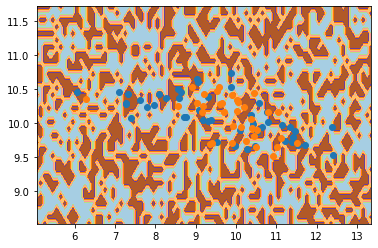

In [62]:
plt.contourf(xx, yy, prd2, cmap='Paired')
for class_value in range(2):
    row_ix = np.where(np.array(prd) == class_value)
    # create scatter of samples
    plt.scatter(XX[row_ix, 0], XX[row_ix, 1], cmap='Paired')
plt.show()

## Note for above question, i tried multiple times, with Matlab I have heard its easier. Doing a python equivalent was difficult with different sizes/unbalanced classes 

### Q 3b. Plot the original D and N data points. Color by group: red for D, and blue for N. Use your point markers to indicate accuracy: “O” when correctly classified by your Bayes classifier, “X” if incorrectly classified.

In [111]:
sns.set(rc={'figure.figsize':(10,10)})

<IPython.core.display.Javascript object>


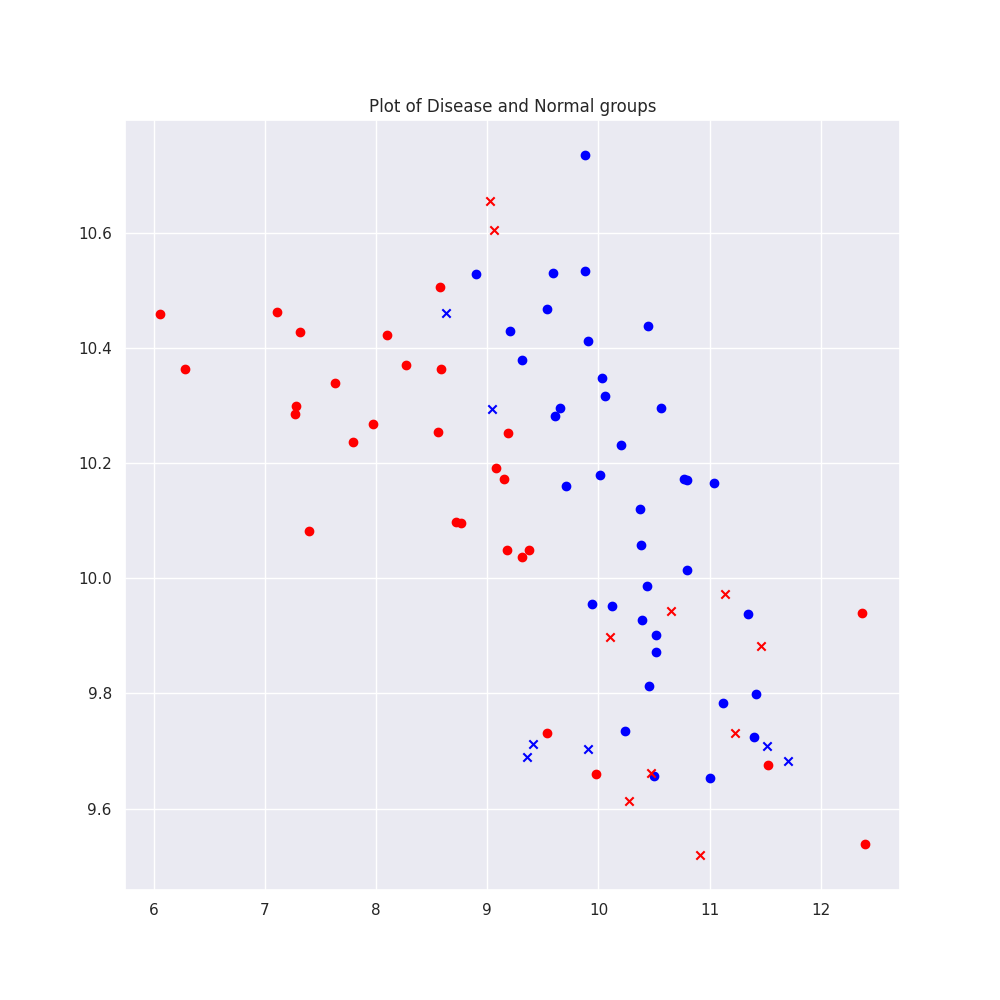

In [112]:
fig , ax = plt.subplots()
for key in res2:
    if key != 'disease_D' and key != 'normal_N':
        if 'disease' in key:
            w = res2[key]
            x,y = w[0]
            truth = w[1]
            pred = w[2]
            if truth == pred:
                ax.scatter(x,y,color='red',marker='o')
            else:
                ax.scatter(x,y,color='red',marker='x')
        elif 'normal' in key: 
            u = res2[key]
            x,y = u[0]
            truth = u[1]
            pred = u[2]
            if truth == pred:
                ax.scatter(x,y,color='blue',marker='o')
            else:
                ax.scatter(x,y,color='blue',marker='x')
ax.set_title('Plot of Disease and Normal groups')
plt.show()